In [1]:
#import all dependencies
!pip install citipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress
import os
# API keys
# OpenWeatherMap API Key
weather_api_key = "42fc9adc90ea2e2c2fdd3e059f13a8de"
# Google API Key
g_key = "AIzaSyAqKJpKDT8joFxSRi-hVSjmLrx1eHgTZc"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Set the Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


In [2]:
#Create empty sets to later hold data
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

In [3]:
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

In [4]:
print("Beginning Data Retrieval ")
print("-----------------------------")

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : bethel
Processing Record 2 of Set 1 : fairbanks
Processing Record 3 of Set 1 : punta arenas
Processing Record 4 of Set 1 : kodiak
Processing Record 5 of Set 1 : georgetown
Processing Record 6 of Set 1 : cape town
Processing Record 7 of Set 1 : vaini
Processing Record 8 of Set 1 : lebu
Processing Record 9 of Set 1 : bluff
Processing Record 10 of Set 1 : makasar
Processing Record 11 of Set 1 : qaanaaq
Processing Record 12 of Set 1 : severodvinsk
Processing Record 13 of Set 1 : port hedland
Processing Record 14 of Set 1 : anloga
Processing Record 15 of Set 1 : raga
Processing Record 16 of Set 1 : neuquen
Processing Record 17 of Set 1 : mazamari
Processing Record 18 of Set 1 : busselton
Processing Record 19 of Set 1 : sao joao da barra
Processing Record 20 of Set 1 : ushuaia
Processing Record 21 of Set 1 : chokurdakh
Processing Record 22 of Set 1 : verkhoyansk
Processing Record 23 of Set 1 : rikitea
Proc

In [5]:

# Create a panda data frame using data retrieved
weather_dict = pd.DataFrame({ 
                "City" : city_name_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list
})

In [6]:
# Count data (545 for each one)
weather_dict.count()
#Display the Data Frame
weather_dict
#create output file 
output_file = "cities_hw.csv"
weather_dict.to_csv(output_file)

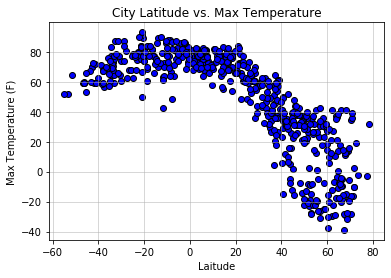

In [7]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Max Temp"], facecolor = "blue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Max Temperature")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")
# Set y axis limit

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)


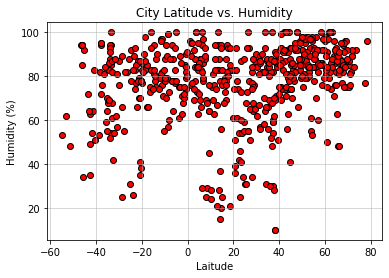

In [8]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Humidity"], facecolor = "red", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Humidity")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

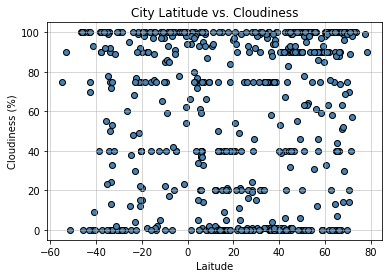

In [9]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Cloudiness")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set y axis limit
plt.ylim(-5,105)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

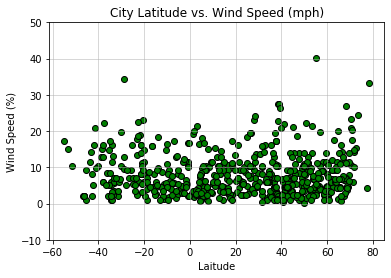

In [10]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Wind Speed"], facecolor = "green", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (mph)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Wind Speed (%)")

# Set y axis limit
plt.ylim(-10,50)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

In [11]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_dict.loc[weather_dict["Lat"] >= 0]
southern_hemisphere = weather_dict.loc[weather_dict["Lat"] < 0]
# Define function for creating linear regression and scatter plot
def linear_regression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotating(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

The r-squared is : -0.85


Text(0, 0.5, 'Max Temp (F)')

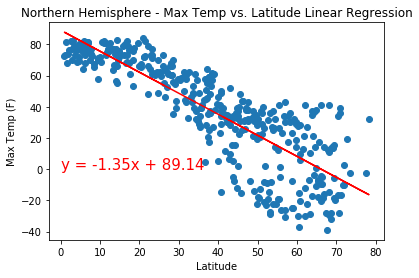

In [12]:
# Call an function #1
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

# Call an function #2
annotating(equation, 0, 0)

# Set a title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")


The r-squared is : 0.49


Text(0, 0.5, 'Max Temp (F)')

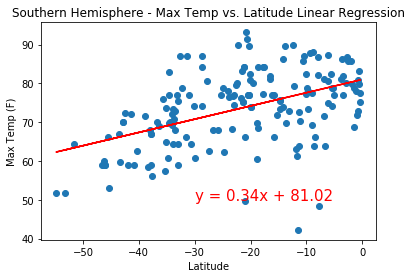

In [13]:
# Call an function #1
equation = linear_regression(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])

# Call an function #2
annotating(equation, -30, 50)

# Set a title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

The r-squared is : 0.27


Text(0, 0.5, 'Humidity (%)')

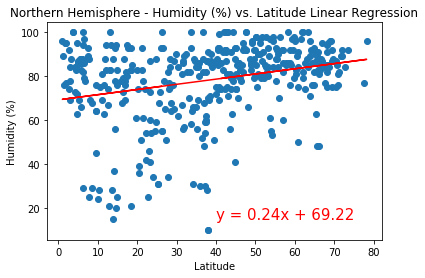

In [14]:
# Call an function #1
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# Call an function #2
annotating(equation, 40, 15)

# Set a title
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

The r-squared is : 0.22


Text(0, 0.5, 'Humidity (%)')

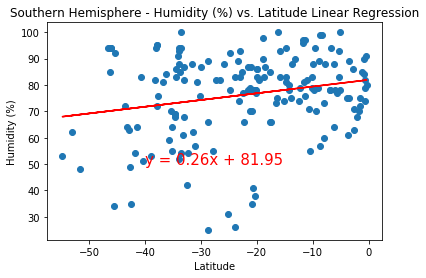

In [15]:
# Call an function #1
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# Call an function #2
annotating(equation, -40, 50)

# Set title
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

The r-squared is : 0.24


Text(0, 0.5, 'Cloudiness (%)')

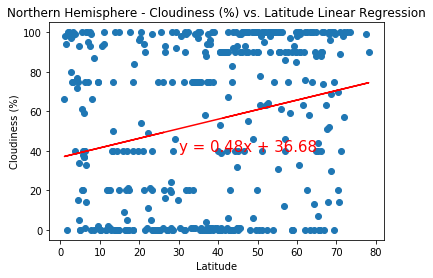

In [16]:
# Call an function #1
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# Call an function #2
annotating(equation, 30, 40)

# Set a title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

The r-squared is : 0.18


Text(0, 0.5, 'Cloudiness (%)')

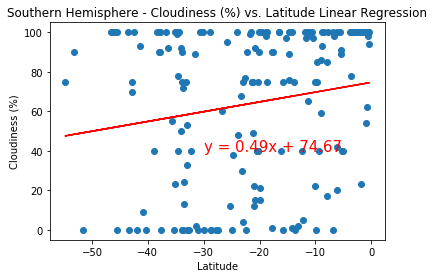

In [17]:
# Call an function #1
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# Call an function #2
annotating(equation, -30, 40)

# Set a title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

The r-squared is : 0.13


Text(0, 0.5, 'Wind Speed (mph)')

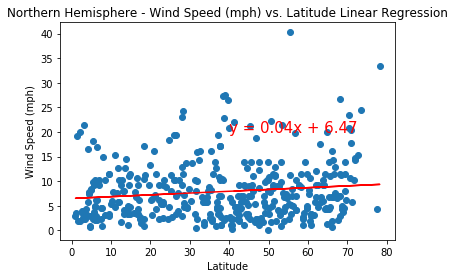

In [18]:
# Call an function #1
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

# Call an function #2
annotating(equation, 40, 20)

# Set  title
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

The r-squared is : -0.1


FileNotFoundError: [Errno 2] No such file or directory: '../Images/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png'

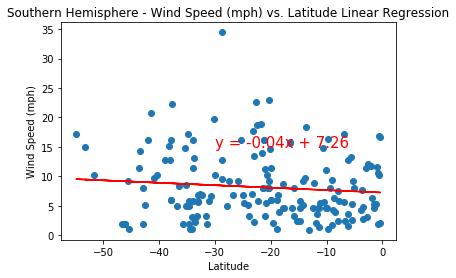

In [19]:
# Call an function #1
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# Call an function #2
annotating(equation, -30, 15)

# Set  title
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")